## Linear regression

Example of linear regression with 2D points.

#### Linear regression

Given a list of points

$$(x_n, y_n) \in \mathbb{R} \times \mathbb{R}, n=1, \dots,N$$

we can find the best line

$$f(x;a,b)=ax+b$$

going through the points and minimizing the mean square error:

$$\textrm{arg min}_{a,b} \frac{1}{N} \sum \limits _{i=1} ^{N} (ax_n+b-y_n)^2$$

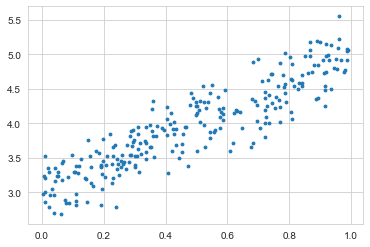

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style = 'whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

# Creating data points
a = 2
b = 3
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x * a + b + noise

# Ploting data
plt.scatter(x, y, s=8)

The data will be stored in a `Dataset` object.

The `__len__` method must return the number of instances (lines or records) in the dataset.

The `__getitem__` method returns a specific instance.

In [33]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        # store the inputs and outputs
        self.X = x
        self.y = y
        # ensure data is float
        self.X = self.X.astype('float32')
        self.y = self.y.astype('float32')
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

A `DataLoader` object is used to iterate over the dataset.

In [34]:
x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

ds = MyDataset(x_train, y_train)
dl = torch.utils.data.DataLoader(ds, shuffle=True)

A model is a subclass of `torch.Model`.

The constructor of your class defines the layers of the model.

The overrided `forward()` defines how to forward propagate input through the defined layers of the model.

In [35]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class LinearRegressionModel(nn.Module):
   def __init__(self, input_dim, output_dim):
      super(LinearRegressionModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)

   def forward(self, x):
      out = self.linear(x)
      return out


Creating and training the model.

In [36]:
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
model = LinearRegressionModel(input_dim, output_dim)

# Defining Mean Square Loss as loss function
criterion = nn.MSELoss() 
# Defining the optimization method
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Iterating over train epochs
for epoch in range(100):
    # Iterating over mini batches
    for i, (inputs, targets) in enumerate(dl):
        # clear the gradients
        optimizer.zero_grad()
        # compute the model output
        yhat = model(inputs)
        # calculate loss
        loss = criterion(yhat, targets)
        # credit assignment
        loss.backward()
        # update model weights
        optimizer.step()


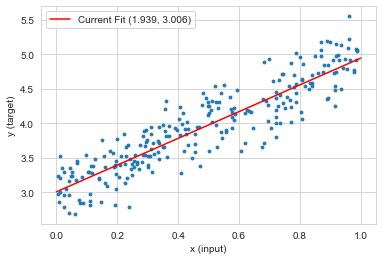

In [37]:
[w, b] = model.parameters()

def plot_current_fit():
    plt.figure()
    plt.scatter(x, y, s = 8)
    w1 = w.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    y1 = x1 * w1.numpy() + b1.numpy()
    plt.plot(x1, y1, 'r', label = 'Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()

plot_current_fit()

References:
- https://fleuret.org/dlc/
- https://jhui.github.io/2018/02/09/PyTorch-Variables-functionals-and-Autograd/
- https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/